In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)
    
    order = np.argsort(x_vals)
    zero = [0.0001]
    y_error = np.append(y_error, zero)
    
    return x_vals[order], y_vals[order], y_error[order]

In [3]:
starts = {}
ends = {}
starts['ZTF19abppewc'] = 0
starts['ZTF20abzcokk'] = 0
starts['ZTF21acaohjl'] = 0
starts['ZTF20aawbodq'] = 1
starts['ZTF19achbhfc'] = 0
starts['ZTF19abzipjc'] = 0
starts['ZTF19abyrano'] = 0
starts['ZTF22aahnvmo'] = 0
starts['ZTF22aakzsrj'] = 0
starts['ZTF21accyuff'] = 0
starts['ZTF21aazmjby'] = 0
starts['ZTF18absnibc'] = 0
starts['ZTF20aavtaib'] = 0
starts['ZTF21acgrero'] = 0
starts['ZTF18abrxrms'] = 0
starts['ZTF18abvkwla'] = 0
starts['ZTF18abcfcoo'] = 0
starts['ZTF20acigmel'] = 0
starts['ZTF20abfhyil'] = 0
ends['ZTF19abppewc'] = 50
ends['ZTF20abzcokk'] = 50
ends['ZTF21acaohjl'] = 50
ends['ZTF20aawbodq'] = 50
ends['ZTF19achbhfc'] = 50
ends['ZTF19abzipjc'] = 50
ends['ZTF19abyrano'] = 100
ends['ZTF22aahnvmo'] = 50
ends['ZTF22aakzsrj'] = 50
ends['ZTF21accyuff'] = 10
ends['ZTF21aazmjby'] = 50
ends['ZTF18absnibc'] = 8
ends['ZTF20aavtaib'] = 50
ends['ZTF21acgrero'] = 50
ends['ZTF18abrxrms'] = 50
ends['ZTF18abvkwla'] = 50
ends['ZTF18abcfcoo'] = 50
ends['ZTF20acigmel'] = 50
ends['ZTF20abfhyil'] = 50

In [4]:
def find_averages(x_vals, flux_vals, y_error):
    groupings = x_vals.astype(int)
    flux_averages = []
    time_averages = []
    for i in np.unique(groupings):
        choose = groupings==i
        x = x_vals[choose]
        y = flux_vals[choose]
        y_err = y_error[choose]
    
        weights = 1/y_err**2
        average = (np.sum(weights*y))/(np.sum(weights))
    
        flux_averages.append(average)
        time_averages.append(np.average(x))
    

    flux_averages = np.array(flux_averages)
    return flux_averages, time_averages

In [5]:
def find_derivative(x_vals, y_vals):
    slope = []
    for i in range(len(y_vals)-1):
        values = (y_vals[i+1]-y_vals[i])/(x_vals[i+1]-x_vals[i])
        slope.append(values)

    time = []
    for i in range(len(x_vals)-1):
        xvalues = (x_vals[i]+x_vals[i+1])/2
        time.append(xvalues)

    return slope, time

In [208]:
def plot_on_top_red(plotname, objectname):
    
    # defining red points
    red_points = plotname['fid']==2
    y_vals = plotname['magpsf'][red_points].values
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    

    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = y_error[minmag_index:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    
    return slope, time

def plot_on_top_green(plotname, objectname):
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    
    
    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = y_error[minmag_index:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [209]:
def plot_on_top_rednd(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['fid']==2
    
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    
    
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['fid']==2
    nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error[minmag_index:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time



In [210]:
def plot_on_top_greennd(plotname, objectname, non_detection):
    #green filter plot
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    
    
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['fid']==1
    nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error[minmag_index:ends[objectname]]
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [211]:
def plot_rednd_FBOT(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['Filter']=='r'
    nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error[minmag_index:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    return slope, time 

def plot_greennd_FBOT(plotname, objectname, non_detection):
    # green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['Filter']=='g'
    nd_x_vals = non_detection['Date'][nd_green_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error[minmag_index:ends[objectname]]
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    return slope, time 


In [212]:
def plot_FBOT_red(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = np.array(y_error)
    
    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error[minmag_index:ends[objectname]]
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_FBOT_green(plotname, objectname):
    #green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 15)
    
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = np.array(y_error)
    
    x_vals = x_vals[minmag_index:ends[objectname]]
    y_vals = y_vals[minmag_index:ends[objectname]]
    y_error = y_error[minmag_index:ends[objectname]]
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

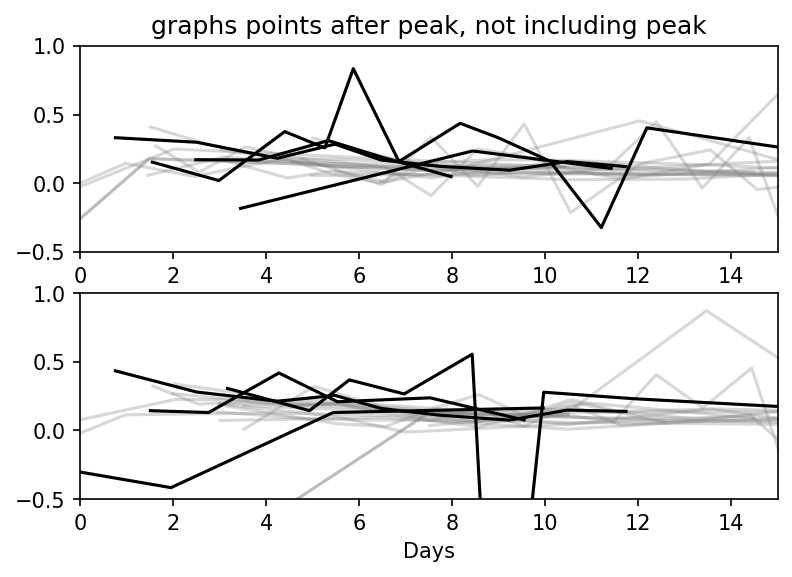

In [213]:
import glob
cv_names = ['ZTF19abppewc', 'ZTF20abzcokk', 'ZTF21acaohjl', 'ZTF20aawbodq', 'ZTF19achbhfc', 'ZTF19abzipjc', 'ZTF19abyrano', 'ZTF22aahnvmo', 'ZTF22aakzsrj', 'ZTF21accyuff', 'ZTF21aazmjby', 'ZTF18absnibc', 'ZTF20aavtaib', 'ZTF21acgrero', 'ZTF18abrxrms', 'ZTF18abrxrms']


plt.figure(dpi=150 )    
ax1 = plt.subplot(2,1,1)
plt.title('graphs points after peak, not including peak')
ax2 = plt.subplot(2,1,2)

for objectname in cv_names:


    # Find the non-detections
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\non_detections_%s.csv" %(objectname,objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_on_top_rednd(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_greennd(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_on_top_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)       

trans_names = ['ZTF18abvkwla', 'ZTF18abcfcoo', 'ZTF20acigmel']      

for objectname in trans_names:
    
    # Find the detections
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_FBOT_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_FBOT_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='black') 
        
ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")
non_detection_abf = ND_4
plotname_abf = ET_4
objectname_abf = 'ZTF20abfhyil'
slope_abf, time_abf = plot_on_top_rednd(plotname_abf, objectname_abf, non_detection_abf)
ax1.plot(time_abf, slope_abf, color='black')

slope_abf, time_abf = plot_on_top_greennd(plotname_abf, objectname_abf, non_detection_abf)
ax2.plot(time_abf, slope_abf, color='black')    
    
        
# Adding text to plot

ax2.set_xlabel("Days")
#ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

ax1.set_ylim(-0.5, 1)
ax1.set_xlim(0, 15)

plt.show()

In [227]:
def plot_on_top_red(plotname, objectname):
    #print("running the plot on top function")
    
    # defining red points
    red_points = plotname['fid']==2
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = np.array(y_error)
    
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_on_top_green(plotname, objectname):
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = np.array(y_error)
    
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [228]:
def plot_on_top_rednd(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['fid']==2
    
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = np.array(y_error)
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    # including last non-detection before first detection
    nd_red_points = non_detection['fid']==2
    nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_on_top_greennd(plotname, objectname, non_detection):
    #green filter plot
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = np.array(y_error)
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    # including last non-detection before first detection
    nd_green_points = non_detection['fid']==1
    nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [229]:
def plot_rednd_FBOT(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['Filter']=='r'
    nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    return slope, time 

def plot_greennd_FBOT(plotname, objectname, non_detection):
    # green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['Filter']=='g'
    nd_x_vals = non_detection['Date'][nd_green_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    return slope, time 


In [230]:
def plot_FBOT_red(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = np.array(y_error)
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_FBOT_green(plotname, objectname):
    #green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = np.array(y_error)
    
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))
    mintime = x_vals[minmag_index]
    endtime = int(mintime + 2)
    
    x_vals = x_vals[starts[objectname]:endtime]
    y_vals = y_vals[starts[objectname]:endtime]
    y_error = y_error[starts[objectname]:endtime]
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

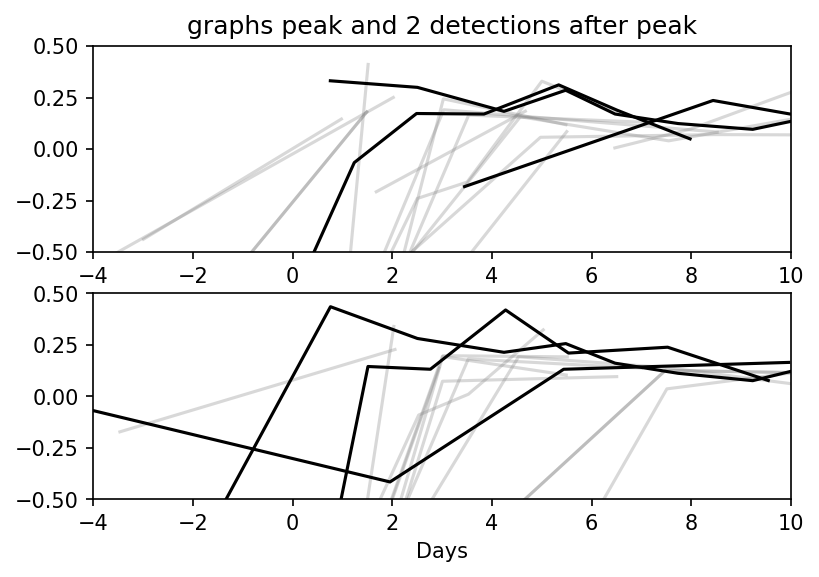

In [236]:
import glob
cv_names = ['ZTF19abppewc', 'ZTF20abzcokk', 'ZTF21acaohjl', 'ZTF20aawbodq', 'ZTF19achbhfc', 'ZTF19abzipjc', 'ZTF19abyrano', 'ZTF22aahnvmo', 'ZTF22aakzsrj', 'ZTF21accyuff', 'ZTF21aazmjby', 'ZTF18absnibc', 'ZTF20aavtaib', 'ZTF21acgrero', 'ZTF18abrxrms', 'ZTF18abrxrms']

plt.figure(dpi=150 )    
ax1 = plt.subplot(2,1,1)
plt.title('graphs peak and 2 detections after peak')
ax2 = plt.subplot(2,1,2)

for objectname in cv_names:


    # Find the non-detections
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\non_detections_%s.csv" %(objectname,objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_on_top_rednd(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_greennd(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_on_top_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)     

        
trans_names = ['ZTF18abvkwla', 'ZTF18abcfcoo', 'ZTF20acigmel']      

for objectname in trans_names:
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s non detections - Sheet1.csv" %(objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_rednd_FBOT(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_greennd_FBOT(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='black')
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_FBOT_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_FBOT_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='black') 

ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")
non_detection_abf = ND_4
plotname_abf = ET_4
objectname_abf = 'ZTF20abfhyil'
slope_abf, time_abf = plot_on_top_rednd(plotname_abf, objectname_abf, non_detection_abf)
ax1.plot(time_abf, slope_abf, color='black')

slope_abf, time_abf = plot_on_top_greennd(plotname_abf, objectname_abf, non_detection_abf)
ax2.plot(time_abf, slope_abf, color='black')
        

# Adding text to plot

ax2.set_xlabel("Days")
#ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

ax1.set_ylim(-0.5, 0.5)
ax1.set_xlim(-4, 10)

plt.show()

In [219]:
def plot_on_top_red(plotname, objectname):
    #print("running the plot on top function")
    
    # defining red points
    red_points = plotname['fid']==2
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    #print(objectname)
    #print(starts[objectname])
    #print(ends[objectname])
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_on_top_green(plotname, objectname):
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [220]:
def plot_on_top_rednd(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['fid']==2
    
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['fid']==2
    nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_on_top_greennd(plotname, objectname, non_detection):
    #green filter plot
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['fid']==1
    nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [221]:
def plot_rednd_FBOT(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['Filter']=='r'
    nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    return slope, time 

def plot_greennd_FBOT(plotname, objectname, non_detection):
    # green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['Filter']=='g'
    nd_x_vals = non_detection['Date'][nd_green_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    return slope, time 


In [222]:
def plot_FBOT_red(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_FBOT_green(plotname, objectname):
    #green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

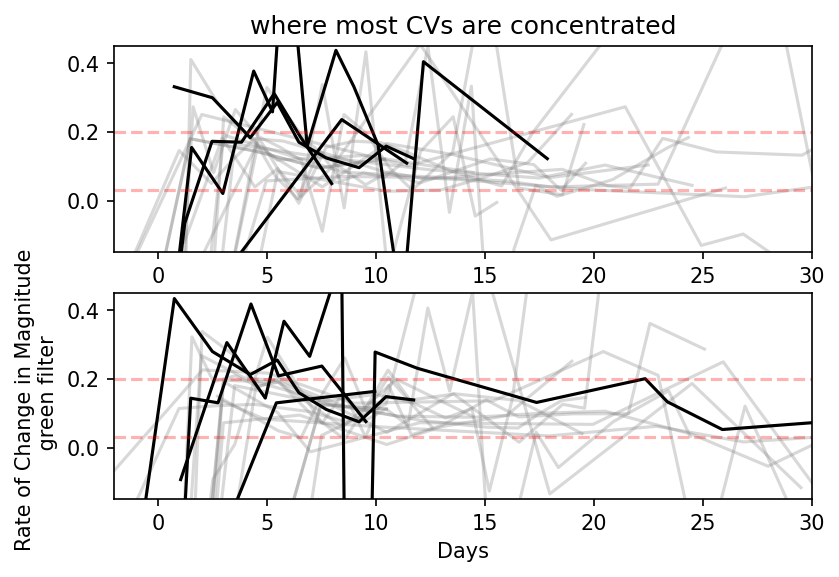

In [226]:
import glob
cv_names = ['ZTF19abppewc', 'ZTF20abzcokk', 'ZTF21acaohjl', 'ZTF20aawbodq', 'ZTF19achbhfc', 'ZTF19abzipjc', 'ZTF19abyrano', 'ZTF22aahnvmo', 'ZTF22aakzsrj', 'ZTF21accyuff', 'ZTF21aazmjby', 'ZTF18absnibc', 'ZTF20aavtaib', 'ZTF21acgrero', 'ZTF18abrxrms', 'ZTF18abrxrms']

plt.figure(dpi=150 )    
ax1 = plt.subplot(2,1,1)
plt.title('where most CVs are concentrated')
ax2 = plt.subplot(2,1,2)

for objectname in cv_names:


    # Find the non-detections
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\non_detections_%s.csv" %(objectname,objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_on_top_rednd(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_greennd(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_on_top_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)     

        
trans_names = ['ZTF18abvkwla', 'ZTF18abcfcoo', 'ZTF20acigmel']      

for objectname in trans_names:
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s non detections - Sheet1.csv" %(objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_rednd_FBOT(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_greennd_FBOT(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='black')
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_FBOT_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_FBOT_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='black') 

ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")
non_detection_abf = ND_4
plotname_abf = ET_4
objectname_abf = 'ZTF20abfhyil'
slope_abf, time_abf = plot_on_top_rednd(plotname_abf, objectname_abf, non_detection_abf)
ax1.plot(time_abf, slope_abf, color='black')

slope_abf, time_abf = plot_on_top_greennd(plotname_abf, objectname_abf, non_detection_abf)
ax2.plot(time_abf, slope_abf, color='black')
        

# Adding text to plot

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
ax1.axhline(0.2, c='red', ls='--', alpha=0.3)
ax1.axhline(0.03, c='red', ls='--', alpha=0.3)

ax2.axhline(0.2, c='red', ls='--', alpha=0.3)
ax2.axhline(0.03, c='red', ls='--', alpha=0.3)

ax1.set_ylim(-0.15, 0.45)
ax1.set_xlim(-2, 30)

plt.show()

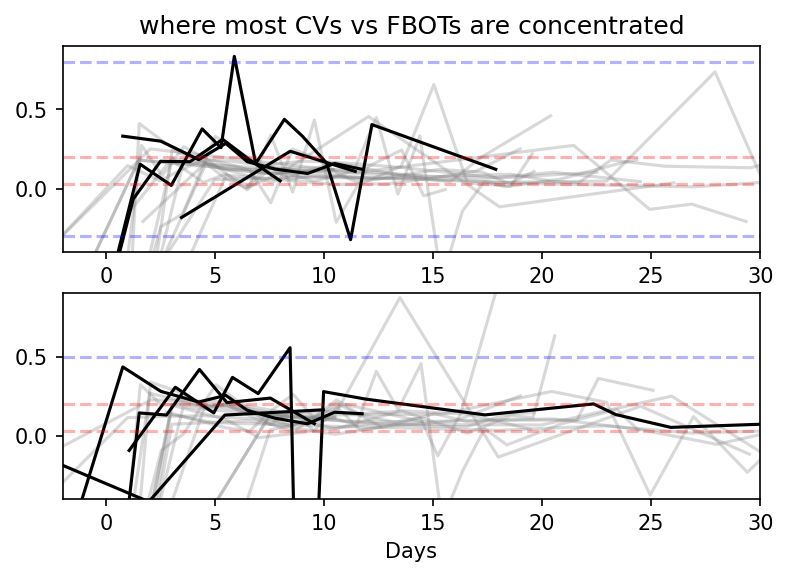

In [225]:
import glob
cv_names = ['ZTF19abppewc', 'ZTF20abzcokk', 'ZTF21acaohjl', 'ZTF20aawbodq', 'ZTF19achbhfc', 'ZTF19abzipjc', 'ZTF19abyrano', 'ZTF22aahnvmo', 'ZTF22aakzsrj', 'ZTF21accyuff', 'ZTF21aazmjby', 'ZTF18absnibc', 'ZTF20aavtaib', 'ZTF21acgrero', 'ZTF18abrxrms', 'ZTF18abrxrms']

plt.figure(dpi=150 )    
ax1 = plt.subplot(2,1,1)
plt.title('where most CVs vs FBOTs are concentrated')
ax2 = plt.subplot(2,1,2)

for objectname in cv_names:


    # Find the non-detections
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\non_detections_%s.csv" %(objectname,objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_on_top_rednd(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_greennd(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_on_top_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)     

        
trans_names = ['ZTF18abvkwla', 'ZTF18abcfcoo', 'ZTF20acigmel']      

for objectname in trans_names:
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s non detections - Sheet1.csv" %(objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_rednd_FBOT(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_greennd_FBOT(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='black')
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_FBOT_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_FBOT_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='black') 

ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")
non_detection_abf = ND_4
plotname_abf = ET_4
objectname_abf = 'ZTF20abfhyil'
slope_abf, time_abf = plot_on_top_rednd(plotname_abf, objectname_abf, non_detection_abf)
ax1.plot(time_abf, slope_abf, color='black')

slope_abf, time_abf = plot_on_top_greennd(plotname_abf, objectname_abf, non_detection_abf)
ax2.plot(time_abf, slope_abf, color='black')
        

# Adding text to plot

ax2.set_xlabel("Days")
#ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
ax1.axhline(0.2, c='red', ls='--', alpha=0.3)
ax1.axhline(0.03, c='red', ls='--', alpha=0.3)
ax1.axhline(0.8, c='blue', ls='--', alpha=0.3)
ax1.axhline(-0.3, c='blue', ls='--', alpha=0.3)

ax2.axhline(0.2, c='red', ls='--', alpha=0.3)
ax2.axhline(0.03, c='red', ls='--', alpha=0.3)
ax2.axhline(0.5, c='blue', ls='--', alpha=0.3)


ax1.set_ylim(-0.4, 0.9)
ax1.set_xlim(-2, 30)

plt.show()